# PTSD Subreddit Feature Analysis and LDA Topic Modeling

# Amie Kong

This notebook includes experiments for the r/ptsd subreddit using Linguistic Inquiry & Word Count (LIWC) Feature Analysis, VADER Sentiment Analysis, and Latent Dirichlet Allocation Topic Modeling.

Subreddit Extraction Resource:

https://www.jcchouinard.com/how-to-use-reddit-api-with-python/


VADER Extraction Resource:
https://github.com/jrosen48/vader-sentiment-example


LDA Topic Modeling Resource:

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0


## Data Extraction & Analysis

In [1]:
import pandas as pd

In [2]:
df_mid = pd.read_csv('reddit_data/liwc_ptsd_midpandemic.csv')
df_pre = pd.read_csv('reddit_data/liwc_ptsd_prepandemic.csv')
df_ctrl = pd.read_csv('reddit_data/liwc_control_ptsd.csv')

In [3]:
df_mid

,Post ID,Title,Body,Author,Publish Date,Total No. of Comments,WC,Analytic,Clout,Authentic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,eoubyp,Would You Take a Pill that Wiped Away Fear-Bas...,&gt;People with post-traumatic stress disorder...,BlueAzzure,2020-01-14 16:25:33,49,164,93.81,72.89,29.01,...,3.05,0.00,3.66,0.61,0.00,12.20,0.00,0.00,3.66,8.54
1,eoukx4,Third of women have PTSD after losing baby thr...,[The Times](https://www.thetimes.co.uk/article...,BlueAzzure,2020-01-14 16:43:58,1,187,98.62,88.03,41.99,...,4.81,0.00,3.21,0.00,0.00,11.23,0.00,1.07,3.21,9.63
2,eousp1,We usually associate PTSD with soldiers and ve...,"&gt;All docs have witnessed the unspeakable, b...",BlueAzzure,2020-01-14 17:00:42,0,164,47.14,88.86,7.12,...,7.32,0.61,3.05,0.00,0.00,5.49,2.44,3.05,1.22,7.32
3,eouuxw,PTSD among prison guards is 10 times that of t...,&gt;In the State Prisons division of the Idaho...,BlueAzzure,2020-01-14 17:05:23,2,218,96.06,73.97,18.39,...,5.96,0.00,2.75,0.00,0.00,7.80,3.67,2.75,0.92,8.26
4,eov7wm,Newly diagnosed. Advice is welcome.,I’ve just very recently been diagnosed with PT...,voodoo-mama_juju,2020-01-14 17:33:35,7,107,10.75,17.50,90.79,...,0.93,0.00,0.00,1.87,0.00,0.00,0.00,3.74,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,gb5673,To anyone that ever sends inappropriate messag...,Please stop I’m tired of getting grown men in ...,Caffeine_cult,2020-04-30 14:53:40,0,125,7.82,28.77,96.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,0.00,0.00
3432,gb5nr3,Anyone else find healing hurts much worse than...,I was traumatized repeatedly over a long term ...,d24602,2020-04-30 15:19:33,12,158,55.57,9.20,99.00,...,6.33,0.00,0.00,0.63,0.63,0.00,0.00,3.80,2.53,0.00
3433,gb5twy,Would you all follow along if I created a PTSD...,"So, I’ve found myself completely unable to wor...",Survivor_08,2020-04-30 15:28:58,11,86,15.97,24.26,64.67,...,6.98,0.00,0.00,2.33,0.00,2.33,0.00,4.65,0.00,0.00
3434,gb6hxi,How do I ask for Triggers properly?,"Dear Reader, \nthis question might have been a...",xentism,2020-04-30 16:05:26,1,186,15.86,68.57,18.37,...,4.30,0.00,0.54,2.15,0.54,1.08,0.00,1.08,1.08,0.54


In [4]:
#col_mid = list(df_mid.columns.values)[7:]
#col_pre = list(df_pre.columns.values)[7:]
personal_concerns = ['work', 'leisure', 'home', 'money', 'relig', 'death']
col_mid = ['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']
col_pre = ['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']

In [5]:
print(col_mid)
print(col_pre)

['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']
['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']


## Summing & Averaging LIWC Values

In [6]:
valueCount_mid = {}
valueCount_pre = {}

totalMid = 0
for item in col_mid:
    try:
        valueCount_mid[item].add(df_mid[item].values.sum())
        for i in valueCount_mid[item]:
            totalMid += float(i)
    except:
        valueCount_mid[item] = [df_mid[item].values.sum()]
        for i in valueCount_mid[item]:
            totalMid += float(i)


for item in valueCount_mid:
    for val in valueCount_mid[item]:
        norm = float(val)/totalMid
        valueCount_mid[item] = norm

print(valueCount_mid)
            

#print(totalMid)
#print('-------')


totalPre = 0
for item in col_pre:
    try:
        valueCount_pre[item].add(df_pre[item].values.sum())
        for i in valueCount_pre[item]:
            totalPre += float(i)
    except:
        valueCount_pre[item] = [df_pre[item].values.sum()]
        for i in valueCount_pre[item]:
            totalPre += float(i)
#print(totalPre)
print('-------')

for item in valueCount_pre:
    for val in valueCount_pre[item]:
        norm = float(val)/totalPre
        valueCount_pre[item] = norm

print(valueCount_pre)

{'affect': 0.11027507994889069, 'social': 0.13042760263023528, 'cogproc': 0.23642703232340964, 'percept': 0.04626561384614721, 'bio': 0.049192311442191126, 'drives': 0.1056114137675076, 'time': 0.09865257904248069, 'relativ': 0.20822734092012005, 'informal': 0.01492102607901767}
-------
{'affect': 0.11102289676578696, 'social': 0.1259597806942806, 'cogproc': 0.23597859224222598, 'percept': 0.04505848233265943, 'bio': 0.05055714237730256, 'drives': 0.10616528064870608, 'time': 0.10008261259278552, 'relativ': 0.21100532138771658, 'informal': 0.014169890958536388}


In [7]:
import matplotlib.pyplot as plotter
labels_mid = []
data_mid = []
for k in valueCount_mid:
    labels_mid.append(k)
    num = float(valueCount_mid[k])
    data_mid.append(num)
print(labels_mid)
print(data_mid)
figureObject, axesObject = plotter.subplots()
plotter.figure(figsize=(10,10))
axesObject.pie(data_mid,

        labels=labels_mid,

        autopct='%1.1f',

        startangle=90)

axesObject.axis('equal')

axesObject.set_title('LIWC of Psychological Processes for r/ptsd (Midpandemic)', fontsize=15)

plotter.show()

['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']
[0.11027507994889069, 0.13042760263023528, 0.23642703232340964, 0.04626561384614721, 0.049192311442191126, 0.1056114137675076, 0.09865257904248069, 0.20822734092012005, 0.01492102607901767]


<Figure size 640x480 with 1 Axes>

<Figure size 1000x1000 with 0 Axes>

['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']
[0.11102289676578696, 0.1259597806942806, 0.23597859224222598, 0.04505848233265943, 0.05055714237730256, 0.10616528064870608, 0.10008261259278552, 0.21100532138771658, 0.014169890958536388]


<Figure size 720x720 with 0 Axes>

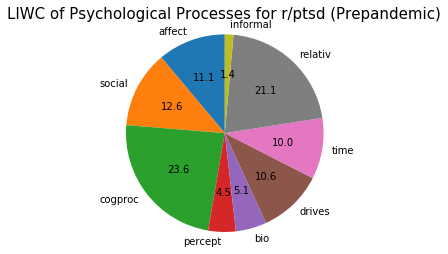

In [8]:
labels_pre = []
data_pre = []
for k in valueCount_pre:
    labels_pre.append(k)
    num = float(valueCount_pre[k])
    data_pre.append(num)
print(labels_pre)
print(data_pre)
plotter.figure(figsize=(10,10))
figureObject_pre, axesObject_pre = plotter.subplots()
axesObject_pre.pie(data_pre,

        labels=labels_pre,

        autopct='%1.1f',

        startangle=90)

axesObject_pre.axis('equal')

axesObject_pre.set_title('LIWC of Psychological Processes for r/ptsd (Prepandemic)', fontsize=15)

plotter.show()

In [9]:
# top 30 most dominant features for midpandemic
count = 0
for w in sorted(valueCount_mid, key=valueCount_mid.get, reverse=True):
    if count <= 30:
        print(w, valueCount_mid[w])
        count += 1

cogproc 0.23642703232340964
relativ 0.20822734092012005
social 0.13042760263023528
affect 0.11027507994889069
drives 0.1056114137675076
time 0.09865257904248069
bio 0.049192311442191126
percept 0.04626561384614721
informal 0.01492102607901767


In [10]:
# top 30 most dominant features for prepandemic
count = 0
for w in sorted(valueCount_pre, key=valueCount_pre.get, reverse=True):
    if count <= 30:
        print(w, valueCount_pre[w])
        count += 1

cogproc 0.23597859224222598
relativ 0.21100532138771658
social 0.1259597806942806
affect 0.11102289676578696
drives 0.10616528064870608
time 0.10008261259278552
bio 0.05055714237730256
percept 0.04505848233265943
informal 0.014169890958536388


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
df_mid.columns

Index(['Post ID', 'Title', 'Body', 'Author', 'Publish Date',
       'Total No. of Comments', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone',
       'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we',
       'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb',
       'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number',
       'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social',
       'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear',
       'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives',
       'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast',
       'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time',
       'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal',
       'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period',
       'Comma', 'Colon', 'SemiC

In [13]:
import re

In [14]:
df_mid['Body'] = df_mid['Body'].astype('str')
df_pre['Body'] = df_pre['Body'].astype('str')
df_ctrl['Body'] = df_ctrl['Body'].astype('str')

## Preprocessing Body Text

In [15]:
from nltk.corpus import stopwords
import redditcleaner

#Removing stop words
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
df_mid['subm_text_processed'] = df_mid['Body'].map(lambda x: re.sub(pattern, '', x))
df_pre['subm_text_processed'] = df_pre['Body'].map(lambda x: re.sub(pattern, '', x))
df_ctrl['subm_text_processed'] = df_ctrl['Body'].map(lambda x: re.sub(pattern, '', x))

#redditclean
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(redditcleaner.clean)
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(redditcleaner.clean)
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(redditcleaner.clean)

#Removing x200b
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('x200b', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('x200b', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('x200b', '', x))


#Removing url links
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', x))

#Removing ampersands
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('amp', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('amp', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('amp', '', x))

#Removing nan
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('nan', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('nan', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('nan', '', x))

#Removing 'like' adverb
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('like', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('like', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('like', '', x))

df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('got', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('got', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('got', '', x))

df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('know', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('know', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('know', '', x))

df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('really', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('really', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('really', '', x))


#Removing new line tabs
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('[\n]', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('[\n]', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('[\n]', '', x))

# Remove punctuation
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('[,\.*!?]', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('[,\.*!?]', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('[,\.*!?]', '', x))

# Convert the titles to lowercase
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: x.lower())
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: x.lower())
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df_mid['subm_text_processed'].head()
df_pre['subm_text_processed'].head()
df_ctrl['subm_text_processed'].head()

df_mid.head()

,Post ID,Title,Body,Author,Publish Date,Total No. of Comments,WC,Analytic,Clout,Authentic,...,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,subm_text_processed
0,eoubyp,Would You Take a Pill that Wiped Away Fear-Bas...,&gt;People with post-traumatic stress disorder...,BlueAzzure,2020-01-14 16:25:33,49,164,93.81,72.89,29.01,...,0.00,3.66,0.61,0.0,12.20,0.00,0.00,3.66,8.54,people post-traumatic stress disorder (ptsd) t...
1,eoukx4,Third of women have PTSD after losing baby thr...,[The Times](https://www.thetimes.co.uk/article...,BlueAzzure,2020-01-14 16:43:58,1,187,98.62,88.03,41.99,...,0.00,3.21,0.00,0.0,11.23,0.00,1.07,3.21,9.63,almost third women miscarriage early pregcy f...
2,eousp1,We usually associate PTSD with soldiers and ve...,"&gt;All docs have witnessed the unspeakable, b...",BlueAzzure,2020-01-14 17:00:42,0,164,47.14,88.86,7.12,...,0.61,3.05,0.00,0.0,5.49,2.44,3.05,1.22,7.32,all docs witnessed unspeakable even today ’har...
3,eouuxw,PTSD among prison guards is 10 times that of t...,&gt;In the State Prisons division of the Idaho...,BlueAzzure,2020-01-14 17:05:23,2,218,96.06,73.97,18.39,...,0.00,2.75,0.00,0.0,7.80,3.67,2.75,0.92,8.26,in state prisons division idaho department cor...
4,eov7wm,Newly diagnosed. Advice is welcome.,I’ve just very recently been diagnosed with PT...,voodoo-mama_juju,2020-01-14 17:33:35,7,107,10.75,17.50,90.79,...,0.00,0.00,1.87,0.0,0.00,0.00,3.74,0.00,0.00,i’recently diagnosed ptsd although i suspected...


## Extracting VADER Sentiment Values

In [16]:
analyzer = SentimentIntensityAnalyzer()
sent = df_mid['subm_text_processed'].apply(analyzer.polarity_scores)
sent_pre = df_pre['subm_text_processed'].apply(analyzer.polarity_scores)
sent_df_mid = pd.DataFrame(sent.tolist())
sent_df_pre = pd.DataFrame(sent_pre.tolist())
sent_df_pre.head()

,neg,neu,pos,compound
0,0.000,0.000,0.000,0.0000
1,0.226,0.635,0.139,-0.9570
2,0.415,0.473,0.113,-0.7435
3,0.318,0.587,0.095,-0.9291
4,0.101,0.633,0.266,0.9651


In [17]:
df_mid = pd.concat([df_mid, sent_df_mid], axis = 1)
df_pre = pd.concat([df_pre, sent_df_pre], axis = 1)
df_pre.head()

,Post ID,Title,Body,Author,Publish Date,Total No. of Comments,WC,Analytic,Clout,Authentic,...,Dash,Quote,Apostro,Parenth,OtherP,subm_text_processed,neg,neu,pos,compound
0,9t9ldc,What is/was your experience with trauma treatm...,nan,LalsRedfield,2018-11-01 06:51:58,26,9,46.37,98.62,1.00,...,0.0,0.00,0.00,0.00,11.11,,0.000,0.000,0.000,0.0000
1,9t9nwa,It all makes sense now and I don’t know what t...,"I should have known, I have years of medical t...",RedheadInA6Speed,2018-11-01 07:01:03,4,368,13.47,20.74,77.55,...,0.0,0.54,3.53,0.00,0.00,i n i years medical training i seen others ’i ...,0.226,0.635,0.139,-0.9570
2,9tar71,Advice/hypersensitivity,Anyone here find an effective way to slow down...,Spankerdoodledandy,2018-11-01 09:04:35,3,36,90.27,71.09,87.07,...,0.0,0.00,2.78,0.00,2.78,anyone find effective way slow startle reflex ...,0.415,0.473,0.113,-0.7435
3,9tb0uu,How are you guys with therapy?,"Hey, for about two years or so, my therapist w...",janaoq1,2018-11-01 09:34:02,11,125,10.65,23.58,33.24,...,0.0,0.00,3.20,0.00,0.00,hey two years therapist older woman little ex...,0.318,0.587,0.095,-0.9291
4,9tbbav,How to be a supportive partner?,My gf and I have been together for 2+ years an...,Lilginge7,2018-11-01 10:06:30,12,194,27.36,84.88,47.46,...,0.0,0.00,3.09,1.03,0.52,my gf i together 2+ years last 10 months har...,0.101,0.633,0.266,0.9651


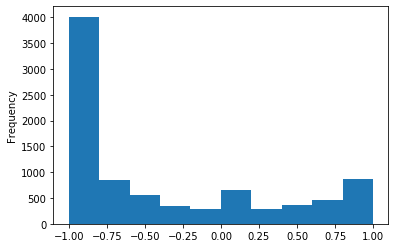

In [18]:
# Graphing Distribution of Vader Sentiment Values on prepandemic subreddits
df_pre['compound'].plot(kind='hist')

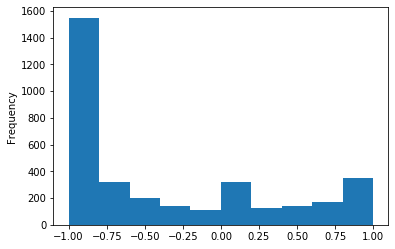

In [19]:
df_mid['compound'].plot(kind='hist')

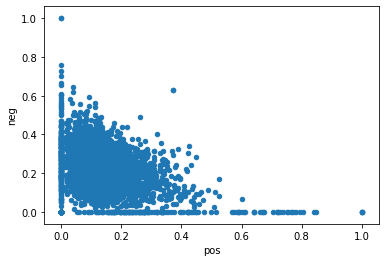

In [20]:
df_mid.plot.scatter(x='pos', y = 'neg')

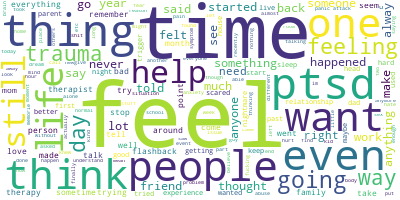

In [21]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string_mid = ','.join(list(df_mid['subm_text_processed'].values))
long_string_pre = ','.join(list(df_pre['subm_text_processed'].values))
long_string_ctrl = ','.join(list(df_ctrl['subm_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string_mid)


# Visualize the word cloud
wordcloud.to_image()

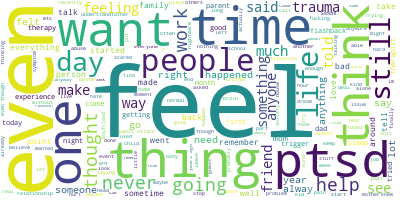

In [22]:
wordcloud.generate(long_string_pre)
wordcloud.to_image()

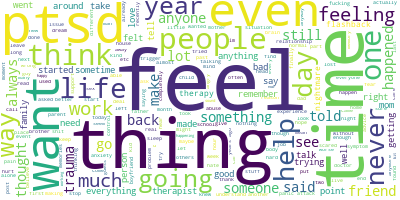

In [23]:
wordcloud.generate(long_string_ctrl)
wordcloud.to_image()

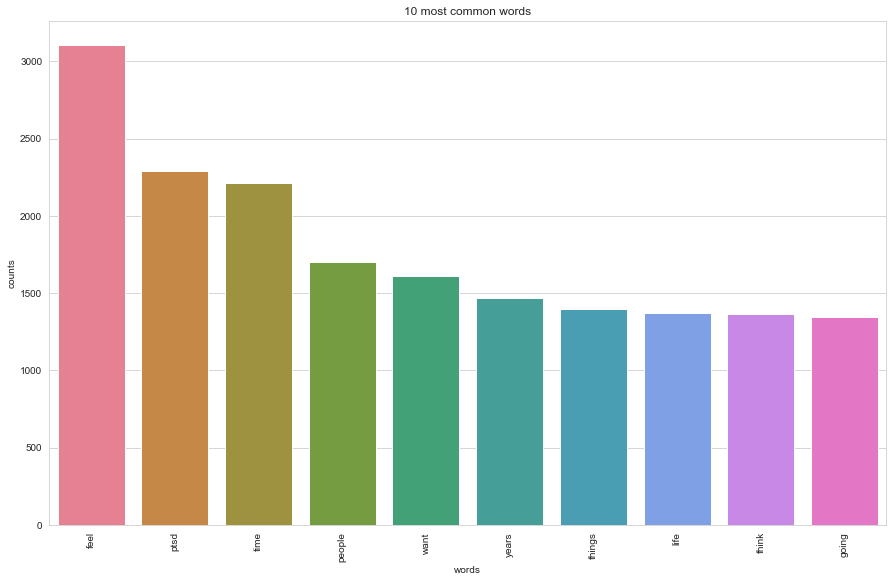

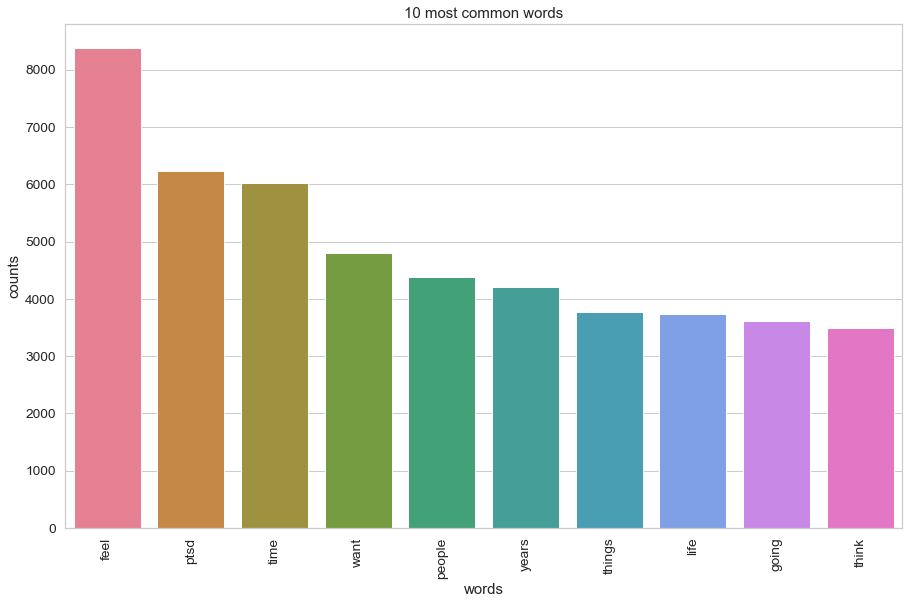

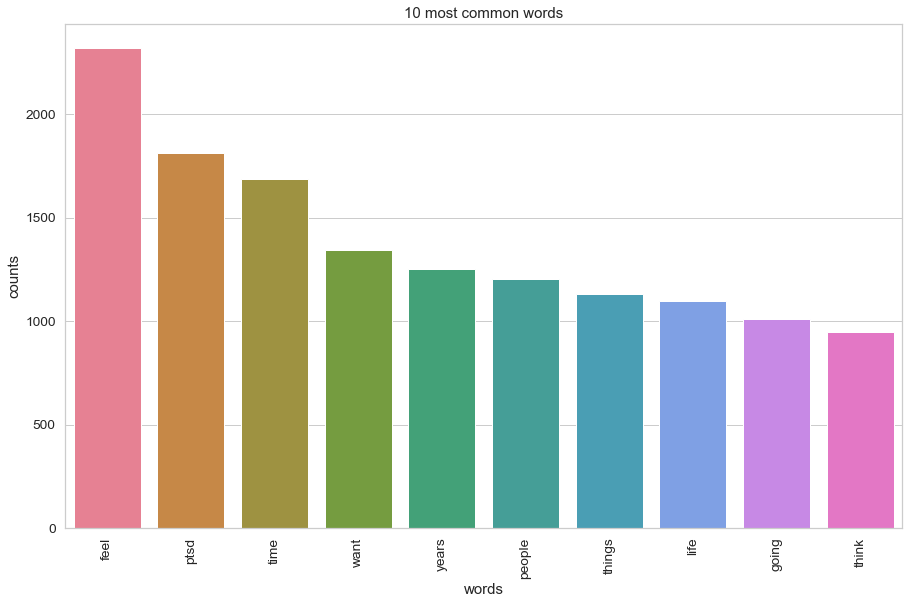

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialize the count vectorizer with the English stop words
count_vectorizer_mid = CountVectorizer(stop_words='english')
count_vectorizer_pre = CountVectorizer(stop_words='english')
count_vectorizer_ctrl = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data_mid = count_vectorizer_mid.fit_transform(df_mid['subm_text_processed'])
count_data_pre = count_vectorizer_pre.fit_transform(df_pre['subm_text_processed'])
count_data_ctrl = count_vectorizer_ctrl.fit_transform(df_ctrl['subm_text_processed'])


# Visualise the 10 most common words
plot_10_most_common_words(count_data_mid, count_vectorizer_mid)
plot_10_most_common_words(count_data_pre, count_vectorizer_pre)
plot_10_most_common_words(count_data_ctrl, count_vectorizer_ctrl)

## Building LDA Topic Model

### Creating the baseline model 


In [25]:
import spacy
import gensim.corpora as corpora
from nltk.corpus import stopwords
import nltk

import pandas as pd
import re
from tqdm import tqdm
from gensim.models.coherencemodel import CoherenceModel

import warnings
import gensim
from gensim import corpora, models
import pyLDAvis.gensim
import en_core_web_sm
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

stopwords = nltk.corpus.stopwords.words('english')

#filtering out frequent words that appeared multiple times in topics
top_words = []

stopwords.extend(top_words)

#nlp = spacy.load("en_core_web_sm")
nlp = en_core_web_sm.load()

data_lemma = []

for txt in tqdm(df_pre['subm_text_processed']):
    lis = []
    doc = nlp(txt)
    for token in doc:
        lis.append(token.lemma_)
    data_lemma.append(' '.join(lis))

def tokenization_with_gen_stop(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)

    return result

data_words = []

for txt in tqdm(data_lemma):
    data_words.append(tokenization_with_gen_stop(txt))

data_words_clean = []

for word in tqdm(data_words):
    wrd = []
    for w in word:
        if w not in stopwords:
            wrd.append(w)
    data_words_clean.append(wrd)

dictionary = corpora.Dictionary(data_words_clean)
dictionary.filter_extremes(no_below=3)
corpus = [dictionary.doc2bow(text) for text in data_words_clean]

num_topics = 15

%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                 id2word=dictionary, \
                                  passes=5, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary.keys()))

for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=4):
    print(str(i)+": "+ topic)
    print()
    
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
# this is the baseline LDA Model
print('\nCoherence Score: ', coherence_lda)

/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
100%|██████████| 8682/8682 [00:01<00:00, 6935.96it/s]


CPU times: user 48.1 s, sys: 122 ms, total: 48.2 s
Wall time: 28 s
0: 0.020*"ptsd" + 0.015*"anxiety" + 0.013*"trauma" + 0.012*"therapy"

1: 0.023*"trauma" + 0.022*"think" + 0.020*"thing" + 0.018*"want"

2: 0.048*"people" + 0.028*"thing" + 0.021*"want" + 0.020*"think"

3: 0.029*"life" + 0.023*"accident" + 0.015*"drive" + 0.014*"stop"

4: 0.012*"school" + 0.012*"work" + 0.012*"help" + 0.011*"time"

5: 0.027*"year" + 0.015*"time" + 0.012*"doctor" + 0.011*"month"

6: 0.045*"sleep" + 0.035*"night" + 0.027*"wake" + 0.022*"time"

7: 0.017*"tell" + 0.014*"time" + 0.011*"think" + 0.011*"start"

8: 0.043*"happen" + 0.034*"remember" + 0.030*"memory" + 0.025*"think"

9: 0.049*"trigger" + 0.032*"attack" + 0.031*"panic" + 0.015*"ptsd"

10: 0.016*"fear" + 0.015*"sexual" + 0.012*"people" + 0.010*"want"

11: 0.027*"want" + 0.018*"time" + 0.018*"think" + 0.015*"tell"

12: 0.035*"work" + 0.022*"tell" + 0.017*"want" + 0.014*"people"

13: 0.082*"ptsd" + 0.019*"diagnose" + 0.019*"experience" + 0.017*"sympto

# LDA Mallet Model <br>
### Fine tuning LDA Mallet Model to see if we can increase Coherence Score <br>
The LDA Mallet Model results in a higher coherence score of 0.3688 when compared to the gensim package LDA Model, which resulted in a lower coherence score of 0.282.
By adjusting the number of topics in the LDA Mallet Model, we can calculate which model results in the higher coherence score. The coherence score increases with the increase in the number of topics. We will select the model with the highest coherence score, which is 10 topics.

In [26]:
from pprint import pprint
import pickle

mallet_path = "/Users/amiekong/Desktop/mallet-2.0.8/bin/mallet"

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=15, id2word=dictionary)

# display topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score for LDA Mallet Model
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words_clean, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('Coherence Score: ', coherence_ldamallet)

with open("./lda_malletModel_ptsd_pre.pkl", "wb") as f:
    pickle.dump(ldamallet, f)

[(14,
  [('family', 0.05177141305823266),
   ('live', 0.03556400162888557),
   ('year', 0.035183928329034886),
   ('parent', 0.033962264150943396),
   ('mother', 0.02554635536853536),
   ('house', 0.023401656033663634),
   ('brother', 0.022641509433962263),
   ('father', 0.021202660513098954),
   ('time', 0.020659698656169404),
   ('leave', 0.018786480249762455)]),
 (10,
  [('panic', 0.053264660820810376),
   ('attack', 0.04967891254033967),
   ('flashback', 0.04645173908791603),
   ('start', 0.03230433223587704),
   ('trigger', 0.030250676402516545),
   ('anxiety', 0.029696515304625616),
   ('thought', 0.02897936564853147),
   ('body', 0.026795318968608404),
   ('fear', 0.020601753756886266),
   ('mind', 0.01822212080711934)]),
 (13,
  [('friend', 0.08830748633270111),
   ('talk', 0.04273122838335379),
   ('relationship', 0.038212652013834655),
   ('time', 0.030095950016735467),
   ('start', 0.02836661831975901),
   ('boyfriend', 0.027139350663840232),
   ('year', 0.025214771839785786

In [27]:
%%time
import os
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis


def convertldaGenToldaMallet(mallet_model):
    model_gensim = models.LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(ldamallet)

#Creating Intertopic Distance Visualization
pyLDAvis.enable_notebook()

LDAvis_data_filepath_ = os.path.join('./ldavis_prepared_pre_ptsd'+str(15))

if 1 == 1:

    LDAvis_prepared_ = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary)

    with open(LDAvis_data_filepath_, 'w') as f:
        pickle.dump(LDAvis_prepared_, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath_) as f:
    LDAvis_prepared_ = pickle.load(f)

    
pyLDAvis.save_html(LDAvis_prepared_, './ldavis_prepared_pre_ptsd'+ str(15) +'.html')

LDAvis_prepared_

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: write() argument must be str, not bytes

In [28]:
LDAvis_prepared_

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3      0.159023 -0.111055       1        1  7.717304
14     0.127852  0.136277       2        1  7.471988
13     0.148950  0.111310       3        1  7.197766
2      0.072207  0.046073       4        1  7.054635
9      0.078824  0.198846       5        1  7.038389
4      0.008161 -0.131114       6        1  6.637355
8      0.150879 -0.113459       7        1  6.592156
5     -0.068092 -0.113324       8        1  6.509427
0     -0.000046  0.075270       9        1  6.470130
7     -0.015727  0.231565      10        1  6.457506
6     -0.191118  0.024966      11        1  6.440679
1     -0.262431 -0.011414      12        1  6.194179
10    -0.014419 -0.272451      13        1  6.085900
11    -0.321650  0.031735      14        1  6.083598
12     0.127589 -0.103227      15        1  6.048995, topic_info=    Category         Freq    Term        Total  loglift  logprob
52   Default  6856.000000    ptsd  6856.000000  30.0000  30.0000
44   Default  5006.000000  people  5006.000000  29.0000  29.0000
79   Default  4071.000000    work  4071.000000  28.0000  28.0000
111  Default  6191.000000   thing  6191.000000  27.0000  27.0000
238  Default  3573.000000  friend  3573.000000  26.0000  26.0000
..       ...          ...     ...          ...      ...      ...
286  Topic15   207.337570    rest   382.230774   2.1936  -5.1001
138  Topic15   300.242920   start  4294.415039   0.1448  -4.7299
488  Topic15   218.667496   today  1343.016724   0.9902  -5.0469
221  Topic15   209.603561  couple   784.416931   1.4856  -5.0892
92   Topic15   219.800476    stop  2264.729980   0.4728  -5.0417

[1362 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4760      9  0.972015       abit
660       2  0.006712      abuse
660       8  0.993392      abuse
1110      8  1.001878     abused
661       8  1.000401     abuser
...     ...       ...        ...
313      13  0.165787  yesterday
495       2  0.541949      young
495       8  0.458684      young
5553     13  1.075795   youtuber
1608     10  1.006715     zoloft

[1968 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 15, 14, 3, 10, 5, 9, 6, 1, 8, 7, 2, 11, 12, 13])